In [1]:
# Import important packages

import numpy as np
import pandas as pd

card = pd.read_csv('creditcard.csv')

In [2]:
# Import various visulization packages

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

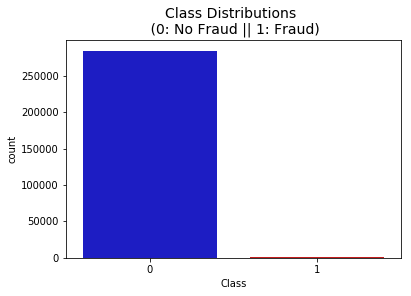

In [3]:
# Plotting bar chart to show the skewiness of the data

colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=card, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

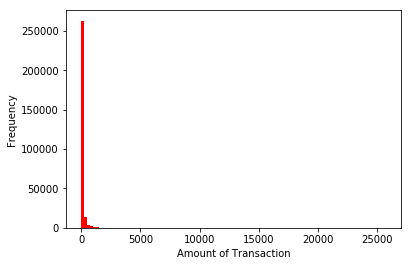

In [4]:
# Plot showing the variations in amount of transaction 

plt.hist(card['Amount'], bins = 100, color = 'red')
plt.xlabel('Amount of Transaction')
plt.ylabel('Frequency')
plt.show()

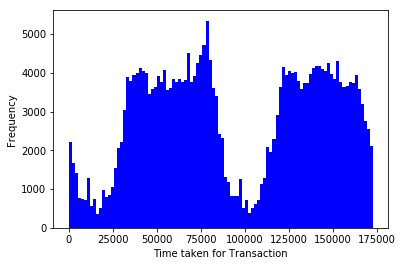

In [5]:
# Plot showing the variations in time taken for a particular transaction 

plt.hist(card['Time'], bins = 100, color = 'Blue')
plt.xlabel('Time taken for Transaction')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Scaling time and amount features

from sklearn.preprocessing import RobustScaler, StandardScaler

rob_scaler = RobustScaler()

card['Scaled Amount'] = rob_scaler.fit_transform(card['Amount'].values.reshape(-1, 1))
card['Scaled Time'] = rob_scaler.fit_transform(card['Time'].values.reshape(-1, 1))

card.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [21]:
# Undersampling the data


card = card.sample(frac =1)

fraud_df = card.loc[card['Class'] == 1]
non_fraud_df = card.loc[card['Class'] == 0][:492]

new_df = pd.concat([fraud_df, non_fraud_df])

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

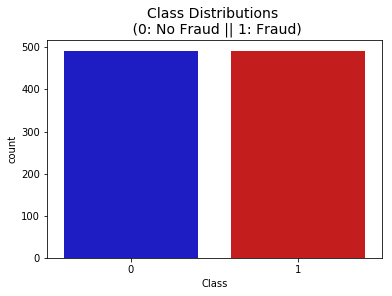

In [22]:
# Equal no.. of fraud and not fraud data

colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [7]:
# Import important Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
card = card.sample(frac = 1)

In [24]:
farud_df = card[card['Class'] == 1]
not_fraud_df = card[card['Class'] == 0][: 492]

new_df = pd.concat([fraud_df, not_fraud_df])

In [25]:
X_new = card.drop(['Class'], axis = 1)
y_new = card['Class']

In [9]:
# Import important evaluation metrics

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [14]:
# Creating variables to train our model


X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

NameError: name 'X' is not defined

In [11]:
from sklearn.model_selection import GridSearchCV

In [25]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [18]:
dr = LogisticRegression()
lr = GridSearchCV(dr, log_reg_params)
lr.fit(X_train, y_train)
log_reg = lr.best_estimator_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

In [14]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

NameError: name 'X_train' is not defined

In [20]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
log_reg_score

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.96202532, 0.93037975, 0.94303797, 0.92356688, 0.93589744])

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rvc_params = {'n_estimators' : list(range(10, 20, 1)), 'max_features' : list(range(15, 28, 1))}
grid_rvc = GridSearchCV(RandomForestClassifier(), rvc_params)
grid_rvc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [23]:
rvc = grid_rvc.best_estimator_

In [24]:
# Implement Logistic Regression and calculating the cross-validation score


lr.fit(X_train, y_train)

print(cross_val_score(lr, X_train, y_train, cv =5))
print(cross_val_score(lr, X_train, y_train, cv =5).mean())

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\skl

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\skl

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

[0.96202532 0.93037975 0.93670886 0.92356688 0.94230769]


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\s

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

0.9389976990678435


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# Confusion matrix and classification report for Logistic Regression

y_predict = log_reg.predict(X_new)

print(classification_report(y_new, y_predict))
print()
print(confusion_matrix(y_new,  y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    284315
           1       0.05      0.93      0.09       492

   micro avg       0.97      0.97      0.97    284807
   macro avg       0.52      0.95      0.54    284807
weighted avg       1.00      0.97      0.98    284807


[[275545   8770]
 [    35    457]]


In [26]:
# Confusion matrix and classification report for K-Nearest Neigbors


y_predict1 = knears_neighbors.predict(X_new)

print(classification_report(y_new, y_predict1))
print()
confusion_matrix(y_new, y_predict1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.09      0.91      0.16       492

   micro avg       0.98      0.98      0.98    284807
   macro avg       0.54      0.95      0.58    284807
weighted avg       1.00      0.98      0.99    284807




array([[279741,   4574],
       [    42,    450]], dtype=int64)

In [27]:
# Confusion matrix and classification report for SVC

y_predict2 = svc.predict(X_new)

print(classification_report(y_new, y_predict2))
print()
print(confusion_matrix(y_new, y_predict2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.91      0.12       492

   micro avg       0.98      0.98      0.98    284807
   macro avg       0.53      0.94      0.55    284807
weighted avg       1.00      0.98      0.99    284807


[[277807   6508]
 [    44    448]]


In [28]:
# Confusion matrix and classification report for Decision tree

y_predict3 = tree_clf.predict(X_new)

print(classification_report(y_new, y_predict3))
print()
print(confusion_matrix(y_new, y_predict3))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.90      0.07       492

   micro avg       0.96      0.96      0.96    284807
   macro avg       0.52      0.93      0.53    284807
weighted avg       1.00      0.96      0.98    284807


[[273033  11282]
 [    50    442]]


In [29]:
## Confusion matrix and classification report for Random Forest

y_predict4 = rvc.predict(X_new)

print(classification_report(y_new, y_predict4))
print()
print(confusion_matrix(y_new, y_predict4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    284315
           1       0.05      0.97      0.10       492

   micro avg       0.97      0.97      0.97    284807
   macro avg       0.53      0.97      0.54    284807
weighted avg       1.00      0.97      0.98    284807


[[275302   9013]
 [    16    476]]


In [30]:
## Trying different approach to solve this problem

In [13]:
duplicate = card.sample(frac = 0.1, random_state = 0, replace = True)
y= duplicate['Class']
X = duplicate.drop(['Class'], axis = 1)

In [29]:
len(duplicate)

28481

In [14]:
## Finding the best perameter for Logistic Regression

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
dr = LogisticRegression()
lr = GridSearchCV(dr, log_reg_params)
lr.fit(X, y)
log_reg = lr.best_estimator_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
## Finding the best parameter for other classifier


knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X, y)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_




C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
clf = KNeighborsClassifier()
clf.fit(X, y)

In [30]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X, y)

# SVC best estimator
svc = grid_svc.best_estimator_


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

In [15]:
import pickle

In [33]:
with open('svc_pickle', 'wb') as f:
    pickle.dump(svc, f)

In [16]:
with open('svc_pickle', 'rb') as f:
    svr = pickle.load(f)

In [11]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X, y)

# tree best estimator
tree_clf = grid_tree.best_estimator_




C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [11]:
# RandomForest Classifier

rvc_params = {'n_estimators' : list(range(10, 20, 1)), 'max_features' : list(range(15, 28, 1))}
grid_rvc = GridSearchCV(RandomForestClassifier(), rvc_params)
grid_rvc.fit(X, y)
rvc = grid_rvc.best_estimator_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [9]:
y_new = card['Class']
X_new = card.drop(['Class'], axis = 1)

In [16]:
y_predict = log_reg.predict(X_new)

print(classification_report(y_new, y_predict))
print()
print(confusion_matrix(y_new,  y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.83      0.58      0.68       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.91      0.79      0.84    284807
weighted avg       1.00      1.00      1.00    284807


[[284256     59]
 [   205    287]]


In [17]:
y_predict1 = knears_neighbors.predict(X_new)

print(classification_report(y_new, y_predict1))
print(confusion_matrix(y_new, y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.86      0.66      0.75       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.93      0.83      0.87    284807
weighted avg       1.00      1.00      1.00    284807

[[284260     55]
 [   167    325]]


In [18]:
y_predict3 = tree_clf.predict(X_new)

print(classification_report(y_new, y_predict3))
print(confusion_matrix(y_new, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.80      0.68      0.74       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.90      0.84      0.87    284807
weighted avg       1.00      1.00      1.00    284807

[[284256     59]
 [   205    287]]


In [19]:
y_predict4 = rvc.predict(X_new)

print(classification_report(y_new, y_predict4))
print(confusion_matrix(y_new, y_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.85      0.73      0.78       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.93      0.86      0.89    284807
weighted avg       1.00      1.00      1.00    284807

[[284254     61]
 [   135    357]]


In [17]:
y_predict5 = svr.predict(X_new)

print(classification_report(y_new, y_predict5))
print(confusion_matrix(y_new, y_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.80      0.82       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.92      0.90      0.91    284807
weighted avg       1.00      1.00      1.00    284807

[[284239     76]
 [    99    393]]


In [21]:
log_reg1 = LogisticRegression()
knears_neighbors1 = KNeighborsClassifier()
svc1 = SVC()
tree_clf1 = DecisionTreeClassifier()



In [29]:
rvc1 = RandomForestClassifier().fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
log_reg1.fit(X, y)
knears_neighbors1.fit(X, y)
svc1.fit(X, y)
tree_clf1.fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_predict = log_reg1.predict(X_new)

print(classification_report(y_new, y_predict))
print(confusion_matrix(y_new, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.81      0.61      0.70       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.91      0.81      0.85    284807
weighted avg       1.00      1.00      1.00    284807

[[284246     69]
 [   190    302]]


In [24]:
y_predict1 = knears_neighbors1.predict(X_new)

print(classification_report(y_new, y_predict1))
print(confusion_matrix(y_new, y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.74      0.78       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.92      0.87      0.89    284807
weighted avg       1.00      1.00      1.00    284807

[[284245     70]
 [   129    363]]


In [26]:
y_predict3 = tree_clf1.predict(X_new)

print(classification_report(y_new, y_predict3))
print(confusion_matrix(y_new, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.61      0.65      0.63       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.80      0.83      0.81    284807
weighted avg       1.00      1.00      1.00    284807

[[284246     69]
 [   190    302]]


In [30]:
y_predict5 = rvc1.predict(X_new)

print(classification_report(y_new, y_predict5))
print(confusion_matrix(y_new, y_predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.88      0.74      0.80       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.94      0.87      0.90    284807
weighted avg       1.00      1.00      1.00    284807

[[284263     52]
 [   127    365]]


In [28]:
y_predict4 = svc1.predict(X_new)

print(classification_report(y_new, y_predict4))
print(confusion_matrix(y_new, y_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.91      0.32      0.47       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.95      0.66      0.74    284807
weighted avg       1.00      1.00      1.00    284807

[[284299     16]
 [   335    157]]


In [22]:
## Anammoly Detection Algorithim

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [30]:
Non_fraud = card[card['Class'] == 0]
fraud = card[card['Class'] == 1]

In [34]:
fraction = len(fraud)/len(Non_fraud)
fraction

0.0017304750013189597

In [35]:
forest = IsolationForest(max_samples = len(X), contamination = fraction)

In [36]:
new = card.copy()

In [37]:
y = new['Class']

In [38]:
new.drop(['Class'], inplace = True, axis = 1)
new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled Amount,Scaled Time
109581,-0.899766,-0.178406,1.566053,1.662826,0.581038,-0.290649,0.745725,-0.196539,-0.725930,0.066012,...,0.198265,0.366171,0.153102,0.082213,0.447145,-0.044184,-0.184820,-0.196874,1.803396,-0.155641
134844,0.891284,-0.549022,1.426302,1.552364,-0.793653,1.547212,-1.008682,0.635713,1.157398,-0.248470,...,0.184468,0.910111,-0.166381,-0.218609,0.492738,-0.086681,0.111138,0.024491,0.505135,-0.043457
140805,0.859899,-2.081375,-1.129472,-1.554803,-0.619941,0.157910,-0.046193,-0.261739,-2.467112,1.424295,...,-0.320632,-1.481930,-0.429578,-1.410664,0.416249,-0.404488,-0.073839,0.058266,5.429330,-0.008752
180822,1.939484,-1.286490,-4.063599,-1.834585,2.480910,2.642389,0.091982,0.346312,-1.237173,0.875300,...,0.583969,1.256213,-0.347232,0.815359,0.737718,0.301804,-0.109618,-0.068463,2.348494,0.470189
118062,0.590787,-1.428625,1.310834,1.274764,-1.802303,0.285613,-0.704040,0.227781,1.741836,-0.543612,...,0.081409,-0.027030,-0.282623,0.460299,0.212129,0.539118,-0.020498,0.073764,3.783973,-0.114628
114159,-0.005637,-0.432550,-0.136893,-3.122994,1.354040,3.385060,-0.824991,0.786196,-2.473513,1.177589,...,-0.184843,-0.355804,-0.134559,0.973567,0.101028,-0.243231,-0.070418,0.011663,-0.097813,-0.133143
153374,-0.468733,1.364506,2.099629,4.568974,1.179982,2.033249,0.468112,-0.076267,-0.234288,0.960281,...,-0.126795,0.368932,-0.555524,0.052669,0.616647,0.639200,-0.204888,-0.124003,0.136100,0.165650
18375,-0.322281,0.740351,1.101265,-0.701177,0.436707,-0.271466,0.606911,0.141581,-0.379078,-0.434278,...,-0.145033,-0.580809,-0.037422,-0.557325,-0.672063,-0.105844,0.096003,0.144266,-0.293579,-0.649244
269482,-0.334599,0.462352,0.719783,-0.598828,-0.417038,0.063889,-0.255814,0.647461,0.172212,-0.748224,...,0.327472,0.889434,-0.035688,-0.350092,-0.507094,0.501986,-0.078942,-0.031999,0.094320,0.927807
264838,-0.385426,0.293093,1.837011,0.168332,-0.214429,0.291326,-0.222087,0.057056,1.582761,-0.966202,...,-0.240122,0.136573,-0.224754,-0.103524,-0.269845,0.625625,0.072970,-0.109853,-0.157759,0.903723


In [39]:
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size = 0.3)

In [40]:
forest.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.0017304750013189597, max_features=1.0,
        max_samples=28481, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [41]:
with open('isc_pickle', 'wb') as f:
    pickle.dump(forest, f)

In [42]:
y_predict = forest.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [43]:
y_predict[y_predict == 1] = 0
y_predict[y_predict == -1] = 1


In [44]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.38      0.39      0.38       144

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.69      0.69      0.69     85443
weighted avg       1.00      1.00      1.00     85443



In [46]:
confusion_matrix(y_test, y_predict)

array([[85207,    92],
       [   88,    56]], dtype=int64)

In [47]:
new_df = card.sample(frac = 0.1)

In [48]:
fraud = new_df[new_df['Class'] == 0]
Non_fraud = new_df[new_df['Class'] == 1]

In [49]:
y_new = new_df['Class']
new_df.drop(['Class'], axis = 1, inplace = True)
X_new = new_df
forest.fit(X_new, y_new)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.0017304750013189597, max_features=1.0,
        max_samples=28481, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [50]:
df = card.copy()
y = df['Class']
df.drop(['Class'], axis = 1, inplace = True)
X = df

In [51]:
Y = forest.predict(X)
Y[Y == 1] = 0
Y[Y == -1] = 1

C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [52]:
print(classification_report(y, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [53]:
confusion_matrix(y, Y)

array([[283975,    340],
       [   354,    138]], dtype=int64)

In [54]:
outlier = LocalOutlierFactor(novelty = True, n_neighbors = 100)

In [55]:
outlier.fit(X_new, y_new)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=100, novelty=True, p=2)

In [ ]:
P = outlier.predict(X)


In [151]:
P[P == 1] = 0
P[P == -1] = 1

In [152]:
print(classification_report(y, P))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.00      0.21      0.01       492

   micro avg       0.90      0.90      0.90    284807
   macro avg       0.50      0.55      0.48    284807
weighted avg       1.00      0.90      0.94    284807

